In [222]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

In [223]:
fifa = pd.read_csv('fifa21_male2.csv')
fifa.head()
fifa.shape

C:\Users\AAndres\AppData\Local\Temp\ipykernel_20664\3133250647.py:1: DtypeWarning: Columns (78) have mixed types. Specify dtype option on import or set low_memory=False.
  fifa = pd.read_csv('fifa21_male2.csv')


(17125, 107)

EXPLORATORY DATA ANALYSIS

We had a small part of exploratory data analysis on a excel sheet. It helped us to try to understand the different columns 
and the relation between them.

The most powerful conclussions from this first step are:

HYPOTHESIS: How nationality influenced the value of football contracts. In which country we would recommend a scouting company to settle in order to have the maximum incomes.

DATA CLEANING: 
- Photos or logos were not needed for our analysis
- We find the conection between the features and the total Stats and we only want to keep the total amounts for our analysis.

In [224]:
#First cleaning on our df. We only keep the columns that might have some interest for our hypothesis

fifa_country = fifa[['Name', 'Age','Nationality','Height','foot','Club','Contract','Value', 'Wage', 'BP','OVA','BOV','POT','Total Stats','Base Stats']]
fifa_country.head()

,Name,Age,Nationality,Height,foot,Club,Contract,Value,Wage,BP,OVA,BOV,POT,Total Stats,Base Stats
0,G. Pasquale,33,Italy,"6'0""",Left,Udinese,2008 ~ 2016,€625K,€7K,LWB,69,71,69,1929,408
1,Luis García,37,Spain,"5'10""",Right,KAS Eupen,2014 ~ 2019,€600K,€7K,CM,71,70,71,1906,385
2,J. Cole,33,England,"5'9""",Right,Coventry City,2016 ~ 2020,€1.1M,€15K,CAM,71,71,71,1770,354
3,D. Yorke,36,Trinidad &amp; Tobago,"5'11""",Right,Sunderland,2009,€0,€0,ST,68,70,82,1348,369
4,Iniesta,36,Spain,"5'7""",Right,Vissel Kobe,2018 ~ 2021,€5.5M,€12K,CAM,81,82,81,2014,420


In [225]:
#Let's take a detailed look into nationality
nationality = fifa_country['Nationality'].value_counts().to_frame().reset_index()
nationality

,index,Nationality
0,England,1707
1,Germany,1154
2,Spain,1121
3,France,990
4,Brazil,857
...,...,...
162,Tanzania,1
163,Singapore,1
164,Eritrea,1
165,Malta,1


In [226]:
nationality.describe()

,Nationality
count,167.000000
mean,102.544910
std,225.488431
min,1.000000
25%,3.500000
50%,19.000000
75%,108.500000
max,1707.000000


In [227]:
#We can see there is a huge difference between the min and max. We will only focus in our analysis on the Nationalitys of the forth quartile.
nationality_select = nationality[nationality['Nationality']>108.5]
nationality_select.shape

(42, 2)

In [228]:
# We filter our df for those nationalities
fifa_country = pd.merge(left=fifa_country,
        right=nationality_select,
        left_on='Nationality',
        right_on='index'
        )

In [229]:
fifa_country = fifa_country.drop(columns = ['index', 'Nationality_y']).rename(columns={'Nationality_x':'Nationality'})
fifa_country

,Name,Age,Nationality,Height,foot,Club,Contract,Value,Wage,BP,OVA,BOV,POT,Total Stats,Base Stats
0,G. Pasquale,33,Italy,"6'0""",Left,Udinese,2008 ~ 2016,€625K,€7K,LWB,69,71,69,1929,408
1,A. Del Piero,38,Italy,"5'9""",Right,Sydney FC,2012 ~ 2014,€190K,€30K,CAM,70,74,70,1682,322
2,A. Nesta,37,Italy,"6'2""",Right,Montreal Impact,2012 ~ 2013,€0,€6K,CB,73,72,73,1548,322
3,P. Maldini,40,Italy,"6'1""",Right,Milan,2009,€0,€0,CB,77,78,89,1471,382
4,G. Buffon,42,Italy,"6'4""",Right,Juventus,2019 ~ 2021,€2.2M,€41K,GK,82,82,82,1292,429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14773,P. Hincapié,18,Ecuador,"6'0""",Left,Club Atlético Talleres,2020 ~ 2025,€250K,€650,CB,58,60,78,1341,289
14774,A. Valencia,16,Ecuador,"5'9""",Right,Independiente del Valle,2020 ~ 2024,€70K,€500,CM,51,53,69,1410,288
14775,J. Mina,18,Ecuador,"5'9""",Left,SV Werder Bremen,2020 ~ 2023,€925K,€2K,CAM,64,66,78,1631,336
14776,A. Preciado,23,Ecuador,"5'9""",Left,Barcelona Sporting Club,2020 ~ 2021,€120K,€500,LM,56,57,62,1351,299


In [230]:
# Contracts: we don't need both dates, only the last one to ending date to see which players are currently active.

fifa_country['Contract'] = fifa_country['Contract'].astype('string')

def extract(col):
  return col[-4:]

fifa_country['Contract end'] = fifa_country['Contract'].apply(extract)
fifa_country['Contract end'].value_counts()

2021    4274
2022    3210
2023    2441
2020    1449
2024    1367
Loan     819
2025     379
2019     220
Free     145
2018     110
2017      79
2016      71
2015      53
2014      43
2013      25
2012      23
2011      18
2007      14
2008      10
2010       9
2009       9
2026       4
1648       3
2028       1
2006       1
2027       1
Name: Contract end, dtype: int64

In [231]:
#We find some different data (Loan, Free, and 1648). Let's take a look at them
fifa_country[fifa_country['Contract end'] == '1648']

,Name,Age,Nationality,Height,foot,Club,Contract,Value,Wage,BP,OVA,BOV,POT,Total Stats,Base Stats,Contract end
7508,H. de Noteboom,32,Netherlands,"6'2""",Right,Netherlands,111648,€0,€0,ST,87,89,90,1700,461,1648
7509,J. Maatje,33,Netherlands,"6'1""",Left,Netherlands,111648,€0,€0,ST,86,85,91,1582,425,1648
7510,B. Ronhaar,23,Netherlands,"5'11""",Left,Netherlands,111648,€0,€0,CF,87,88,90,1603,438,1648


In [232]:
fifa_country[fifa_country['Contract end'] == 'Free']

,Name,Age,Nationality,Height,foot,Club,Contract,Value,Wage,BP,OVA,BOV,POT,Total Stats,Base Stats,Contract end
611,Santi Cazorla,35,Spain,"5'6""",Right,Spain,Free,€0,€0,CM,82,82,82,2129,437,Free
1690,D. Beckham,37,England,"6'0""",Right,NaN,England Free,€0,€0,CM,78,77,78,2012,411,Free
3418,B. Schweinsteiger,34,Germany,"6'0""",Right,NaN,Germany Free,€0,€0,CB,75,75,75,1999,394,Free
4777,A. Williams,35,Wales,"6'0""",Right,Wales,Free,€0,€0,CB,69,69,69,1564,335,Free
4884,J. Lawrence,27,Wales,"6'2""",Left,Wales,Free,€0,€0,CB,69,71,71,1549,336,Free
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14715,C. Lendezo,26,Ecuador,"5'7""",Right,Ecuador,Free,€0,€0,RW,70,71,70,1720,369,Free
14716,S. Herreyra,27,Ecuador,"6'3""",Right,Ecuador,Free,€0,€0,CB,69,71,72,1437,318,Free
14717,B. Vendaza,39,Ecuador,"5'11""",Right,Ecuador,Free,€0,€0,CDM,72,72,72,1702,370,Free
14718,M. Farrero,27,Ecuador,"5'6""",Right,Ecuador,Free,€0,€0,CAM,67,68,68,1858,382,Free


In [233]:
fifa_country[fifa_country['Contract end'] == 'Loan']

,Name,Age,Nationality,Height,foot,Club,Contract,Value,Wage,BP,OVA,BOV,POT,Total Stats,Base Stats,Contract end
16,A. Floro Flores,34,Italy,"6'0""",Right,Chievo Verona,"Bari Jun 30, 2018 On Loan",€400K,€6K,CAM,72,67,72,1834,381,Loan
84,A. Candreva,33,Italy,"5'11""",Right,Sampdoria,"Jun 30, 2021 On Loan",€6.5M,€23K,RM,78,78,78,2046,432,Loan
154,D. Falcinelli,28,Italy,"6'1""",Left,Perugia,"Jun 30, 2020 On Loan",€2.4M,€4K,ST,71,71,71,1599,343,Loan
162,Rômulo,32,Italy,"5'10""",Right,Brescia,"Jun 30, 2020 On Loan",€5M,€15K,RM,75,75,75,2054,432,Loan
189,N. Leali,26,Italy,"6'4""",Right,Ascoli,"Jun 1, 2021 On Loan",€1.6M,€2K,GK,70,70,73,1076,369,Loan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14678,A. Chalá,24,Ecuador,"5'10""",Left,Dijon FCO,"Jun 30, 2021 On Loan",€1.3M,€6K,LB,69,69,76,1745,389,Loan
14682,J. Intriago,24,Ecuador,"5'9""",Right,FC Juárez,"Jun 30, 2021 On Loan",€3M,€7K,CDM,71,72,78,1866,399,Loan
14695,S. Plaza,21,Ecuador,"6'2""",Right,Trabzonspor,"Jun 30, 2021 On Loan",€1.6M,€10K,ST,68,70,79,1660,365,Loan
14697,B. Angulo,24,Ecuador,"6'0""",Right,Club Tijuana,"Jun 30, 2021 On Loan",€2.5M,€12K,ST,70,72,76,1623,353,Loan


In [234]:
# We will drop "1648" because we only have 3 values and "free" there are nor currently active players, not intereisting for us right now.
# For the "loan", as they are active, we will assign them the year 2023 to include them in our analysis.
# We will then drop the "Contract" column. We don't need it any more
fifa_country=fifa_country[(fifa_country['Contract end'] != 'Free')&(fifa_country['Contract end'] != '1648')]
fifa_country['Contract end'] = fifa_country['Contract end'].str.replace('Loan','2023')
fifa_country = fifa_country.drop(columns=['Contract'])
fifa_country

C:\Users\AAndres\AppData\Local\Temp\ipykernel_20664\3452682982.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fifa_country['Contract end'] = fifa_country['Contract end'].str.replace('Loan','2023')


,Name,Age,Nationality,Height,foot,Club,Value,Wage,BP,OVA,BOV,POT,Total Stats,Base Stats,Contract end
0,G. Pasquale,33,Italy,"6'0""",Left,Udinese,€625K,€7K,LWB,69,71,69,1929,408,2016
1,A. Del Piero,38,Italy,"5'9""",Right,Sydney FC,€190K,€30K,CAM,70,74,70,1682,322,2014
2,A. Nesta,37,Italy,"6'2""",Right,Montreal Impact,€0,€6K,CB,73,72,73,1548,322,2013
3,P. Maldini,40,Italy,"6'1""",Right,Milan,€0,€0,CB,77,78,89,1471,382,2009
4,G. Buffon,42,Italy,"6'4""",Right,Juventus,€2.2M,€41K,GK,82,82,82,1292,429,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14773,P. Hincapié,18,Ecuador,"6'0""",Left,Club Atlético Talleres,€250K,€650,CB,58,60,78,1341,289,2025
14774,A. Valencia,16,Ecuador,"5'9""",Right,Independiente del Valle,€70K,€500,CM,51,53,69,1410,288,2024
14775,J. Mina,18,Ecuador,"5'9""",Left,SV Werder Bremen,€925K,€2K,CAM,64,66,78,1631,336,2023
14776,A. Preciado,23,Ecuador,"5'9""",Left,Barcelona Sporting Club,€120K,€500,LM,56,57,62,1351,299,2021


In [235]:
# Cleaning on Value and Wage
#We create a function to do part of the cleaning: 

fifa_country['Value'] = fifa_country['Value'].str.replace("€","")
fifa_country['Wage'] = fifa_country['Wage'].str.replace("€","")

def extract(col): 
    x=col[:-1]
    y=col[-1]
    if y=='K':
        return float(x)*1000
    elif y=='M':
        return float(x)*1000000

In [236]:
fifa_country['Value'] = fifa_country['Value'].apply(extract).fillna(0)
fifa_country['Wage'] = fifa_country['Wage'].apply(extract).fillna(0)
fifa_country

,Name,Age,Nationality,Height,foot,Club,Value,Wage,BP,OVA,BOV,POT,Total Stats,Base Stats,Contract end
0,G. Pasquale,33,Italy,"6'0""",Left,Udinese,625000.0,7000.0,LWB,69,71,69,1929,408,2016
1,A. Del Piero,38,Italy,"5'9""",Right,Sydney FC,190000.0,30000.0,CAM,70,74,70,1682,322,2014
2,A. Nesta,37,Italy,"6'2""",Right,Montreal Impact,0.0,6000.0,CB,73,72,73,1548,322,2013
3,P. Maldini,40,Italy,"6'1""",Right,Milan,0.0,0.0,CB,77,78,89,1471,382,2009
4,G. Buffon,42,Italy,"6'4""",Right,Juventus,2200000.0,41000.0,GK,82,82,82,1292,429,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14773,P. Hincapié,18,Ecuador,"6'0""",Left,Club Atlético Talleres,250000.0,0.0,CB,58,60,78,1341,289,2025
14774,A. Valencia,16,Ecuador,"5'9""",Right,Independiente del Valle,70000.0,0.0,CM,51,53,69,1410,288,2024
14775,J. Mina,18,Ecuador,"5'9""",Left,SV Werder Bremen,925000.0,2000.0,CAM,64,66,78,1631,336,2023
14776,A. Preciado,23,Ecuador,"5'9""",Left,Barcelona Sporting Club,120000.0,0.0,LM,56,57,62,1351,299,2021


In [237]:
#We still have some small amount of players with 'Value' 0, worthless for our analysis

fifa_country=fifa_country[(fifa_country['Value']>0)]
fifa_country['Value'].value_counts()

1100000.0     431
1000000.0     303
450000.0      293
1200000.0     291
325000.0      290
             ... 
59500000.0      1
52000000.0      1
54500000.0      1
53500000.0      1
52500000.0      1
Name: Value, Length: 213, dtype: int64

<AxesSubplot:>

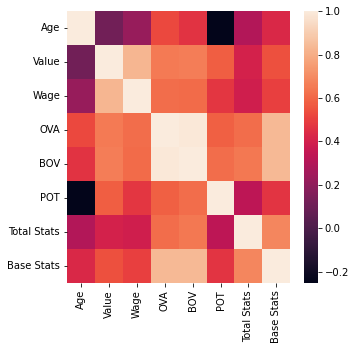

In [238]:
# Let's take a general look to our data

sns.heatmap(fifa_country.corr())

In [239]:
#Conclussions:
#POT-AGE are negatively correlated, so we are going to drop POT because it doesn't give us further information
#BOV-OVA are also very correlated, so we are going to drop BOV
#Wage and Value are also very correlated, so we are going to drop Wage
#We also decide the position and club are not useful for us, so we will also drop "bp" and "club"

fifa_country = fifa_country.drop(columns = ['POT','BOV','BP','Club','Wage'])
fifa_country

,Name,Age,Nationality,Height,foot,Value,OVA,Total Stats,Base Stats,Contract end
0,G. Pasquale,33,Italy,"6'0""",Left,625000.0,69,1929,408,2016
1,A. Del Piero,38,Italy,"5'9""",Right,190000.0,70,1682,322,2014
4,G. Buffon,42,Italy,"6'4""",Right,2200000.0,82,1292,429,2021
6,F. Inzaghi,37,Italy,"5'11""",Right,350000.0,73,1507,285,2012
7,C. Abbiati,37,Italy,"6'3""",Right,1300000.0,75,1160,407,2020
...,...,...,...,...,...,...,...,...,...,...
14773,P. Hincapié,18,Ecuador,"6'0""",Left,250000.0,58,1341,289,2025
14774,A. Valencia,16,Ecuador,"5'9""",Right,70000.0,51,1410,288,2024
14775,J. Mina,18,Ecuador,"5'9""",Left,925000.0,64,1631,336,2023
14776,A. Preciado,23,Ecuador,"5'9""",Left,120000.0,56,1351,299,2021


In [240]:
#Regarding the date of contract end, we want the most updated data to avoid changes on market prices within the years.
fifa_country['Contract end'].value_counts()

2021    4265
2023    3258
2022    3210
2020    1447
2024    1367
2025     379
2019     219
2018     110
2017      76
2016      65
2015      48
2014      38
2013      18
2012      18
2026       4
2028       1
2027       1
Name: Contract end, dtype: int64

In [241]:
fifa_country.groupby(['Contract end']).agg({'Value':'mean'}).sort_values('Contract end', ascending=False)

,Value
Contract end,
2028,2.250000e+07
2027,1.550000e+07
2026,2.337500e+07
2025,5.628285e+06
2024,4.947178e+06
2023,3.541794e+06
2022,2.731310e+06
2021,1.603747e+06
2020,1.268610e+06


In [242]:
# We check that keeping only active players (considering contracts over 2020) would be a good idea
fifa_country['Contract end']=fifa_country['Contract end'].astype('int')
fifa_country=fifa_country[(fifa_country['Contract end']>=2020)]
fifa_country

,Name,Age,Nationality,Height,foot,Value,OVA,Total Stats,Base Stats,Contract end
4,G. Buffon,42,Italy,"6'4""",Right,2200000.0,82,1292,429,2021
7,C. Abbiati,37,Italy,"6'3""",Right,1300000.0,75,1160,407,2020
16,A. Floro Flores,34,Italy,"6'0""",Right,400000.0,72,1834,381,2023
25,D. De Rossi,35,Italy,"6'0""",Right,7000000.0,82,2083,427,2020
26,T. Berni,37,Italy,"6'1""",Right,45000.0,64,951,342,2020
...,...,...,...,...,...,...,...,...,...,...
14773,P. Hincapié,18,Ecuador,"6'0""",Left,250000.0,58,1341,289,2025
14774,A. Valencia,16,Ecuador,"5'9""",Right,70000.0,51,1410,288,2024
14775,J. Mina,18,Ecuador,"5'9""",Left,925000.0,64,1631,336,2023
14776,A. Preciado,23,Ecuador,"5'9""",Left,120000.0,56,1351,299,2021


In [243]:
# EDA

# Which are the best countries to locate a scout agency? / In which country are produced the best football players?
# (Remember that we are asked for very high level players!)

In [244]:
#Top 10 countries which produce most players. But let's see if they are the ones we are looking for:

country_nplayers = fifa_country['Nationality'].value_counts().to_frame().reset_index()
country_nplayers.head(10)

,index,Nationality
0,England,1634
1,Germany,1117
2,Spain,1071
3,France,936
4,Argentina,751
5,Brazil,736
6,Italy,523
7,Netherlands,451
8,Portugal,342
9,United States,338


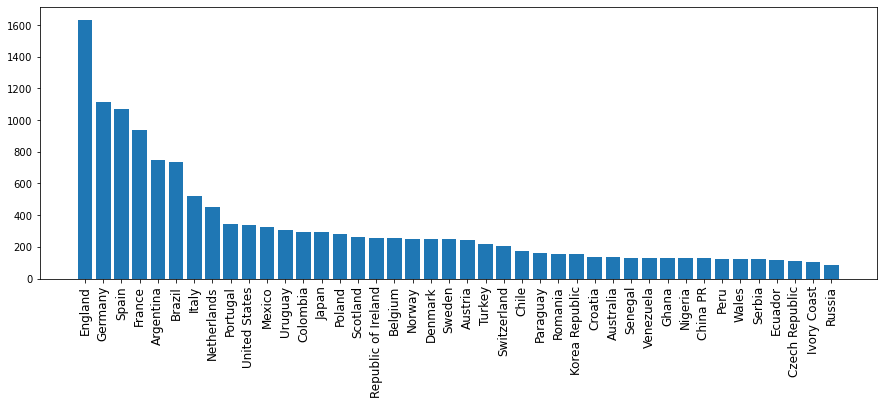

In [245]:
plt.rcParams["figure.figsize"] = (15,5)
plt.bar(country_nplayers['index'],country_nplayers['Nationality'])
plt.xticks(fontsize=12,rotation=90)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

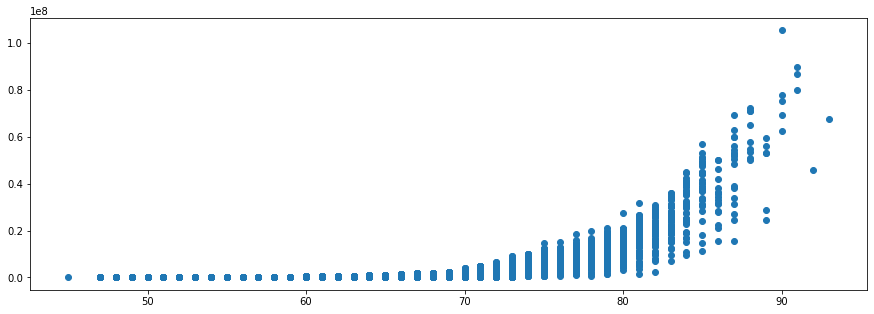

In [246]:
plt.scatter(x=fifa_country['OVA'], y=fifa_country['Value'])
plt.show

In [247]:
# Where are the best players from? OVA>80
country_bestOVAplayers = fifa_country[fifa_country['OVA']>80]
country_bestOVAplayers['Nationality'].value_counts().head(10)

Spain          57
Brazil         48
France         38
Germany        31
Argentina      22
Italy          20
England        19
Portugal       18
Belgium        16
Netherlands    15
Name: Nationality, dtype: int64

In [248]:
# Where are the most valuable players from? Value>10M€
country_bestvalue = fifa_country[fifa_country['Value']>10000000]
top10players = country_bestvalue['Nationality'].value_counts().head(10)
top10players

Spain          121
Brazil          93
France          90
Germany         54
England         52
Argentina       51
Portugal        43
Italy           42
Belgium         27
Netherlands     25
Name: Nationality, dtype: int64

In [249]:
# Now we merge the df with the top 10 most valuable nationalities and the top 10 countries with the best FIFA players.
# The two top 10 are the same. So this is are the top 10 countries with the best FIFA players, where they can probably found more of them

top10players = pd.DataFrame(top10players).reset_index().rename(columns={'index':'Nationality','Nationality':'N_players'})
top10players

,Nationality,N_players
0,Spain,121
1,Brazil,93
2,France,90
3,Germany,54
4,England,52
5,Argentina,51
6,Portugal,43
7,Italy,42
8,Belgium,27
9,Netherlands,25


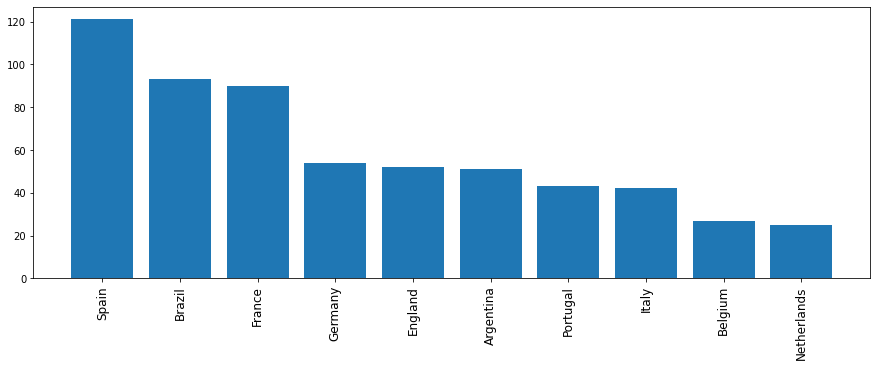

In [250]:
# Top 10 countries with the best FIFA players (OVA>80 & Value>10M€)

plt.rcParams["figure.figsize"] = (15,5)
plt.bar(top10players['Nationality'],top10players['N_players'])
plt.xticks(fontsize=12,rotation=90)
plt.show()

In [251]:
# SEE IF THERE IS A CORRELATION BETWEEN FOOT AND VALUE

In [252]:
fifa_country['foot'].value_counts()

Right    10482
Left      3450
Name: foot, dtype: int64

In [253]:
fifa_country[['Left','Right']]=pd.get_dummies(fifa_country['foot'])
fifa_country

C:\Users\AAndres\AppData\Local\Temp\ipykernel_20664\4001747244.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fifa_country[['Left','Right']]=pd.get_dummies(fifa_country['foot'])
C:\Users\AAndres\AppData\Local\Temp\ipykernel_20664\4001747244.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fifa_country[['Left','Right']]=pd.get_dummies(fifa_country['foot'])


,Name,Age,Nationality,Height,foot,Value,OVA,Total Stats,Base Stats,Contract end,Left,Right
4,G. Buffon,42,Italy,"6'4""",Right,2200000.0,82,1292,429,2021,0,1
7,C. Abbiati,37,Italy,"6'3""",Right,1300000.0,75,1160,407,2020,0,1
16,A. Floro Flores,34,Italy,"6'0""",Right,400000.0,72,1834,381,2023,0,1
25,D. De Rossi,35,Italy,"6'0""",Right,7000000.0,82,2083,427,2020,0,1
26,T. Berni,37,Italy,"6'1""",Right,45000.0,64,951,342,2020,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
14773,P. Hincapié,18,Ecuador,"6'0""",Left,250000.0,58,1341,289,2025,1,0
14774,A. Valencia,16,Ecuador,"5'9""",Right,70000.0,51,1410,288,2024,0,1
14775,J. Mina,18,Ecuador,"5'9""",Left,925000.0,64,1631,336,2023,1,0
14776,A. Preciado,23,Ecuador,"5'9""",Left,120000.0,56,1351,299,2021,1,0


In [254]:
Foot1=list(['Left','Right','Value'])
fifa_country[Foot1].corr()

,Left,Right,Value
Left,1.000000,-1.000000,0.014708
Right,-1.000000,1.000000,-0.014708
Value,0.014708,-0.014708,1.000000


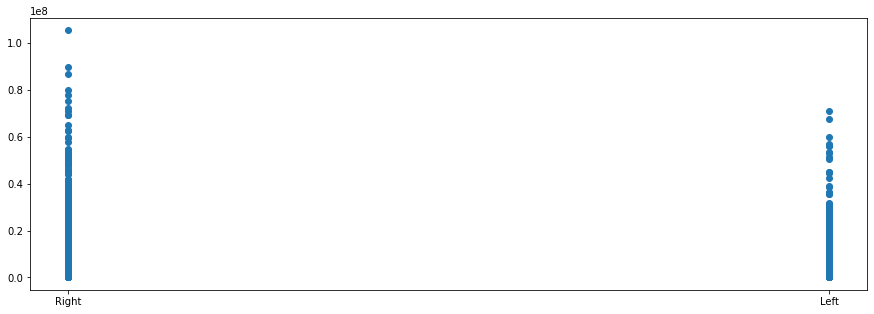

In [255]:
plt.scatter(fifa_country['foot'], fifa_country['Value'])
plt.show()

In [256]:
fifa_country_L=fifa_country[(fifa_country['foot']=='Left')]
fifa_country_L.describe()

,Age,Value,OVA,Total Stats,Base Stats,Contract end,Left,Right
count,3450.000000,3.450000e+03,3450.000000,3450.000000,3450.000000,3450.000000,3450.0,3450.0
mean,24.718551,2.872504e+06,67.092754,1675.164638,363.771014,2022.046957,1.0,0.0
std,4.607774,5.629080e+06,6.709615,228.423580,40.074398,1.254784,0.0,0.0
min,16.000000,3.000000e+04,47.000000,830.000000,239.000000,2020.000000,1.0,0.0
25%,21.000000,4.250000e+05,63.000000,1532.000000,336.000000,2021.000000,1.0,0.0
50%,24.000000,8.750000e+05,67.000000,1692.500000,365.000000,2022.000000,1.0,0.0
75%,28.000000,2.800000e+06,72.000000,1836.000000,392.000000,2023.000000,1.0,0.0
max,41.000000,7.100000e+07,93.000000,2288.000000,498.000000,2027.000000,1.0,0.0


In [257]:
## It doesn't seem an irrelevant relation.

In [258]:
# CREATE A MODEL TO PREDICT THE VALUE OF HIGH-LEVEL PLAYERS
fifa_country = fifa_country.drop(columns = ['Left', 'Right'])
fifa_country

,Name,Age,Nationality,Height,foot,Value,OVA,Total Stats,Base Stats,Contract end
4,G. Buffon,42,Italy,"6'4""",Right,2200000.0,82,1292,429,2021
7,C. Abbiati,37,Italy,"6'3""",Right,1300000.0,75,1160,407,2020
16,A. Floro Flores,34,Italy,"6'0""",Right,400000.0,72,1834,381,2023
25,D. De Rossi,35,Italy,"6'0""",Right,7000000.0,82,2083,427,2020
26,T. Berni,37,Italy,"6'1""",Right,45000.0,64,951,342,2020
...,...,...,...,...,...,...,...,...,...,...
14773,P. Hincapié,18,Ecuador,"6'0""",Left,250000.0,58,1341,289,2025
14774,A. Valencia,16,Ecuador,"5'9""",Right,70000.0,51,1410,288,2024
14775,J. Mina,18,Ecuador,"5'9""",Left,925000.0,64,1631,336,2023
14776,A. Preciado,23,Ecuador,"5'9""",Left,120000.0,56,1351,299,2021


<AxesSubplot:>

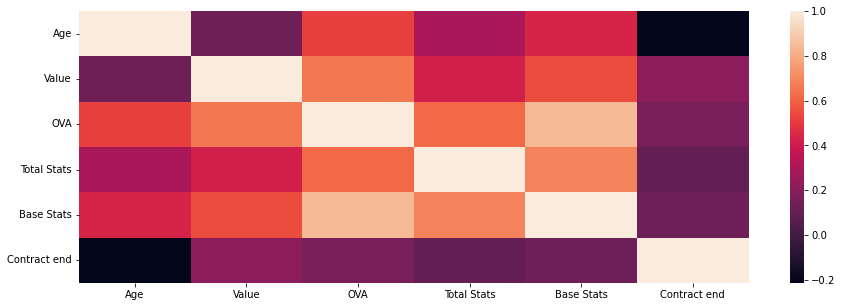

In [175]:
sns.heatmap(fifa_country.corr())

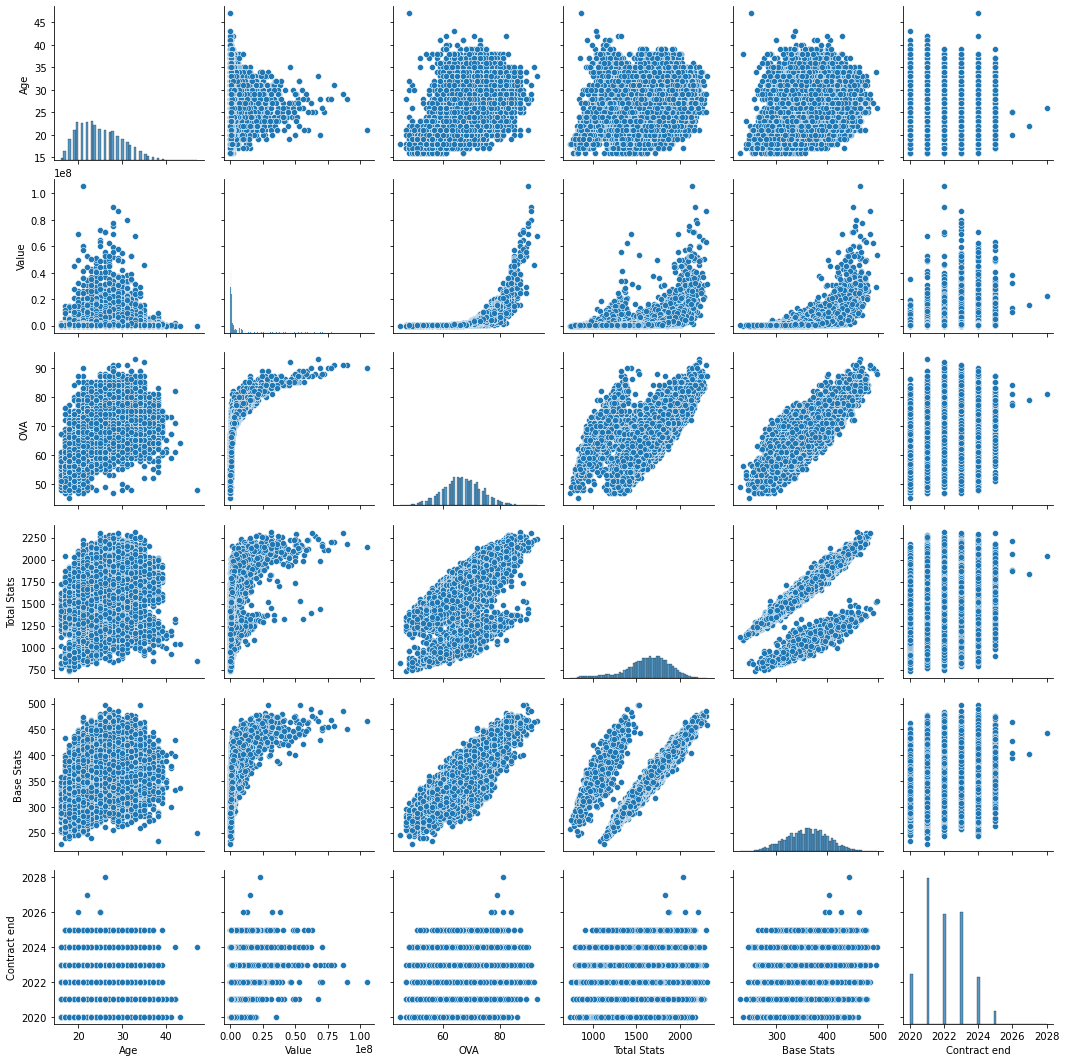

In [176]:
sns.pairplot(fifa_country)

In [177]:
np.corrcoef(fifa_country['OVA'], fifa_country['Value'])

array([[1.        , 0.65705229],
       [0.65705229, 1.        ]])

In [259]:
# We keep the columns I will use to create the model

fifa_model = fifa_country[['Age','OVA','Value']]
fifa_model

,Age,OVA,Value
4,42,82,2200000.0
7,37,75,1300000.0
16,34,72,400000.0
25,35,82,7000000.0
26,37,64,45000.0
...,...,...,...
14773,18,58,250000.0
14774,16,51,70000.0
14775,18,64,925000.0
14776,23,56,120000.0


<AxesSubplot:>

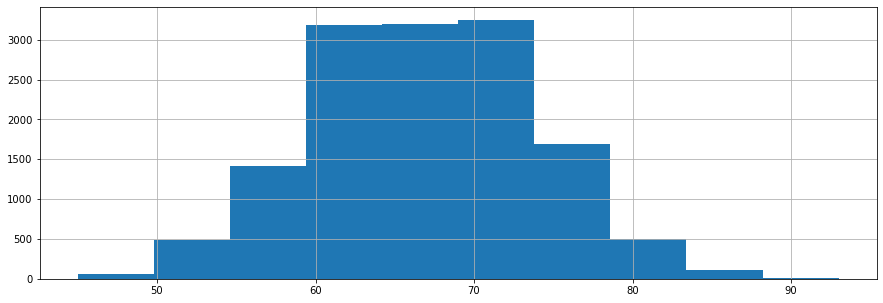

In [179]:
fifa_model['OVA'].hist()

<AxesSubplot:>

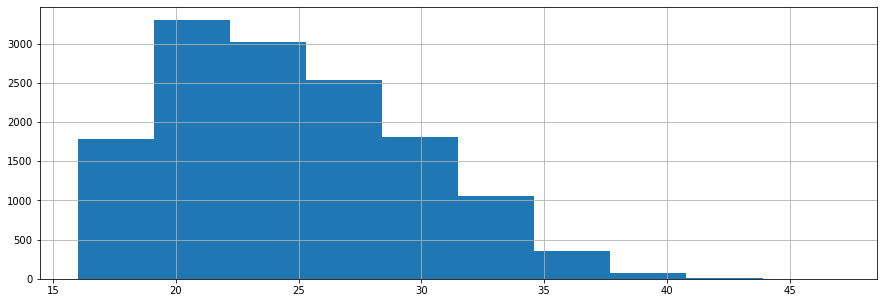

In [180]:
fifa_model['Age'].hist()

In [181]:
from sklearn.preprocessing import StandardScaler

standardizer = StandardScaler()
fifa_model[['Age','OVA']] = standardizer.fit_transform(fifa_model[['Age','OVA']])
fifa_model.head()

C:\Users\AAndres\AppData\Local\Temp\ipykernel_20664\3736061532.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fifa_model[['Age','OVA']] = standardizer.fit_transform(fifa_model[['Age','OVA']])


,Age,OVA,Value
4,3.560885,2.195328,2200000.0
7,2.519301,1.183216,1300000.0
16,1.894350,0.749453,400000.0
25,2.102667,2.195328,7000000.0
26,2.519301,-0.407246,45000.0


In [183]:
X=fifa_model.drop(columns=['Value'])
y=fifa_model['Value']

In [184]:
from sklearn import linear_model

model = linear_model.LinearRegression()
result = model.fit(X,y)

In [185]:
result.score(X,y)

0.49685935740001297

In [187]:
# Let's try to improve the model by slecting only the high-OVA players that is our target
fifa_model2 = fifa_country[['Age','OVA','Value']]
fifa_model2

,Age,OVA,Value
4,42,82,2200000.0
7,37,75,1300000.0
16,34,72,400000.0
25,35,82,7000000.0
26,37,64,45000.0
...,...,...,...
14773,18,58,250000.0
14774,16,51,70000.0
14775,18,64,925000.0
14776,23,56,120000.0


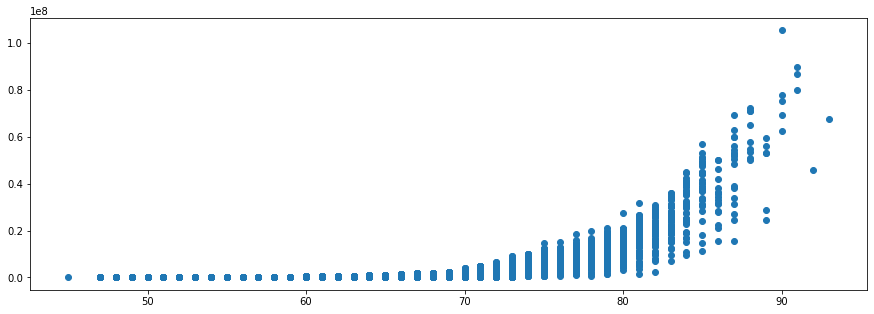

In [188]:
plt.scatter(fifa_model2['OVA'], fifa_model2['Value'])
plt.show()

In [189]:
#Only 5 players above 90, we drop them from our study.
fifa_model2[fifa_model2['OVA']>90]

,Age,OVA,Value
5498,28,91,90000000.0
6381,33,93,67500000.0
7120,35,92,46000000.0
9237,31,91,80000000.0
11526,29,91,87000000.0


In [190]:
fifa_model2 = fifa_model2[fifa_model2['OVA']>70]
fifa_model2

,Age,OVA,Value
4,42,82,2200000.0
7,37,75,1300000.0
16,34,72,400000.0
25,35,82,7000000.0
29,32,74,2500000.0
...,...,...,...
14698,19,74,10000000.0
14722,35,71,1000000.0
14723,30,73,3100000.0
14743,26,71,2400000.0


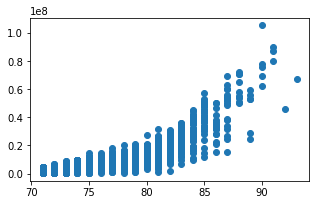

In [210]:
plt.scatter(fifa_model2['OVA'], fifa_model2['Value'])
plt.rcParams["figure.figsize"] = (5,5)
plt.show()

In [211]:
# Standarization

from sklearn.preprocessing import StandardScaler

standardizer = StandardScaler()
fifa_model2[['Age','OVA']] = standardizer.fit_transform(fifa_model2[['Age','OVA']])
fifa_model2

C:\Users\AAndres\AppData\Local\Temp\ipykernel_20664\1083692349.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fifa_model2[['Age','OVA']] = standardizer.fit_transform(fifa_model2[['Age','OVA']])


,Age,OVA,Value
4,3.445171,1.948967,2200000.0
7,2.249860,0.019649,1300000.0
16,1.532674,-0.807202,400000.0
25,1.771736,1.948967,7000000.0
29,1.054549,-0.255968,2500000.0
...,...,...,...
14698,-2.053259,-0.255968,10000000.0
14722,1.771736,-1.082819,1000000.0
14723,0.576425,-0.531585,3100000.0
14743,-0.379824,-1.082819,2400000.0


In [212]:
np.corrcoef(fifa_model2['OVA'], fifa_model2['Value'])

array([[1.        , 0.83714934],
       [0.83714934, 1.        ]])

In [213]:
X1=fifa_model2.drop(columns=['Value'])
y1=fifa_model2['Value']

In [214]:
from sklearn import linear_model

model = linear_model.LinearRegression()
result = model.fit(X1,y1)

In [215]:
result.score(X1,y1)

0.7666201269230857

In [260]:
# We will repeat the same analysis droping the >90 OVA
fifa_model3 = fifa_country[['Age','OVA','Value']]
fifa_model3

,Age,OVA,Value
4,42,82,2200000.0
7,37,75,1300000.0
16,34,72,400000.0
25,35,82,7000000.0
26,37,64,45000.0
...,...,...,...
14773,18,58,250000.0
14774,16,51,70000.0
14775,18,64,925000.0
14776,23,56,120000.0


In [263]:
fifa_model3 = fifa_model3[(fifa_model3['OVA']>70)&(fifa_model3['OVA']<90)]
fifa_model3

,Age,OVA,Value
4,42,82,2200000.0
7,37,75,1300000.0
16,34,72,400000.0
25,35,82,7000000.0
29,32,74,2500000.0
...,...,...,...
14698,19,74,10000000.0
14722,35,71,1000000.0
14723,30,73,3100000.0
14743,26,71,2400000.0


In [264]:
# Standarization

from sklearn.preprocessing import StandardScaler

standardizer = StandardScaler()
fifa_model3[['Age','OVA']] = standardizer.fit_transform(fifa_model3[['Age','OVA']])
fifa_model3

C:\Users\AAndres\AppData\Local\Temp\ipykernel_20664\547294953.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fifa_model3[['Age','OVA']] = standardizer.fit_transform(fifa_model3[['Age','OVA']])


,Age,OVA,Value
4,3.445093,2.004775,2200000.0
7,2.250054,0.031016,1300000.0
16,1.533031,-0.814880,400000.0
25,1.772039,2.004775,7000000.0
29,1.055015,-0.250949,2500000.0
...,...,...,...
14698,-2.052086,-0.250949,10000000.0
14722,1.772039,-1.096846,1000000.0
14723,0.577000,-0.532915,3100000.0
14743,-0.379031,-1.096846,2400000.0


In [266]:
X2=fifa_model3.drop(columns=['Value'])
y2=fifa_model3['Value']

In [267]:
from sklearn import linear_model

model = linear_model.LinearRegression()
result = model.fit(X2,y2)

In [268]:
result.score(X2,y2)

0.7880288054722402

In [ ]:
# Here we have the model to predict the value of a player with high level by including his level and his age.